### INTRODUCTION

- Every bank wants to hold there customers for sustaining their business so the ABC Multinational bank.Below is the customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.
- This dataset is for ABC Multistate bank with following columns:

- customer_id, unused variable.
- credit_score, used as input.
- country, used as input.
- gender, used as input.
- age, used as input.
- tenure, used as input.
- balance, used as input.
- products_number, used as input.
- credit_card, used as input.
- active_member, used as input.
- estimated_salary, used as input.
- churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.
- Aim is to Predict the Customer Churn for ABC Bank

### LOADING PAKAGES AND DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [3]:
# loading the dataset to pandas Dataframabse
bank_cust_df = pd.read_csv(r"C:\Users\lenovo\Python data\Projects\Bank Customer Churn Prediction\Bank_Churn_Data.csv")

In [4]:
# printing the first 5 rows of the dataframe
bank_cust_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Just by looking at the dataset I think that as we are only intrested in predicting the people leaving the bank or not, columns like custimer_id and credit score dosen't help.

- We can further remove those columns.

- But as I say, I think so, that dose not mean it has to be it.

- So before comming to any conclusion let's explore our data even more

In [5]:
#descriptive statistics summary
bank_cust_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
bank_cust_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
bank_cust_df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
bank_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Observation so far

- By doing some of the above steps I can conclude some points as,

- There is no null values in data set, which is quite good for us
- There are 9 quantitaive feature and 2 qualitative feature

### Data Visualization

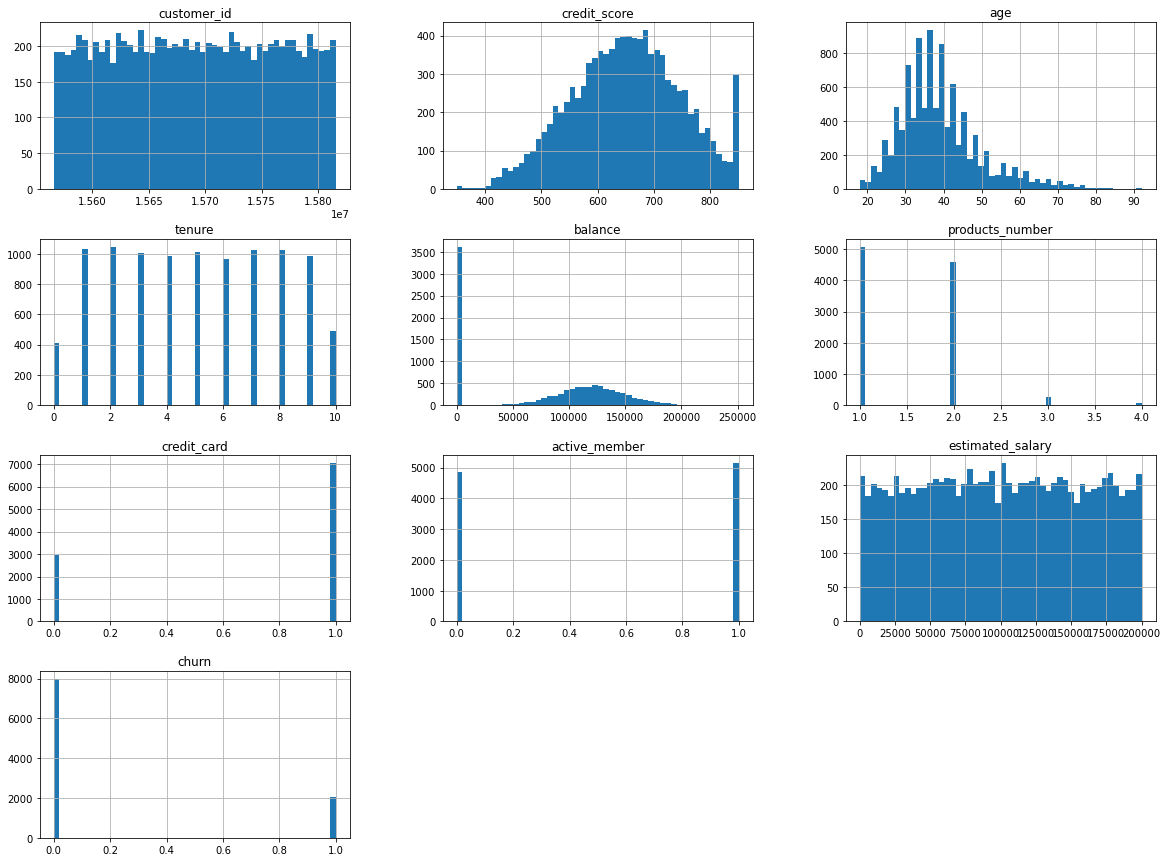

In [9]:
import matplotlib.pyplot as plt
bank_cust_df.hist(bins=50, figsize=(20,15))
# x-axis is column Values and Y-axis is Total Counts
plt.show()

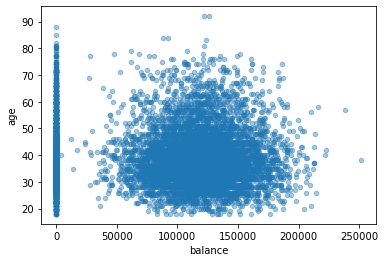

In [11]:
bank_cust_df.plot(kind="scatter", x="balance", y="age", alpha=0.4);

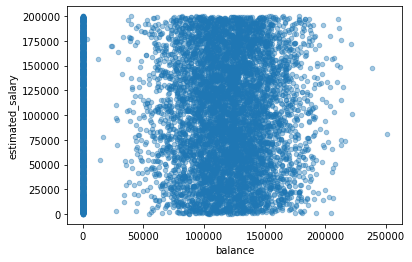

In [12]:
bank_cust_df.plot(kind="scatter", x="balance", y="estimated_salary", alpha=0.4);

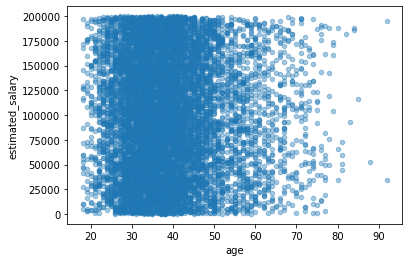

In [13]:
bank_cust_df.plot(kind="scatter", x="age", y="estimated_salary", alpha=0.4);

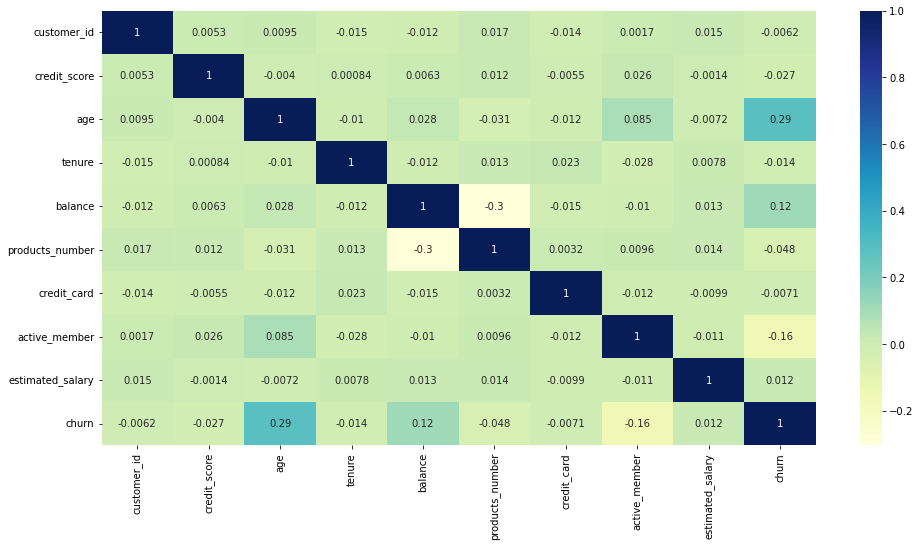

In [15]:
correlation = bank_cust_df.corr()
fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
sns.heatmap(correlation,annot=True,cmap="YlGnBu");

### Observation so far

- Everything looks good so far, but I think there is almost no correlation between any variables.

- Though I got a bit shock by looking at some scatter plots where it says,

- Most of the people range from age 20 to 90 has zero balance in there accounts🤦‍
- People has lot salary but don't have balance in there account, which made me think that what are they doing with their salaries?🤔
- Most of the people range from age 20 to 90 has has zero salary, aren't they working?😒 and that might be the reason for not having balance in thier accounts.

In [18]:
# to check those columns which are non-numeric
bank_cust_df.select_dtypes(include='object').columns

Index(['country', 'gender'], dtype='object')

In [19]:
# to check those columns which are numeric
bank_cust_df.select_dtypes(exclude='object').columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [21]:
bank_cust_df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [22]:
bank_cust_df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [23]:
# convert categorical columns to numerical values
bank_cust_df.gender = bank_cust_df.gender.replace({"Male":1, "Female":0})
bank_cust_df.country = bank_cust_df.country.replace({"France": 0, "Germany":1, "Spain":2})

In [25]:
#Deleteing unwanted columns
bank_cust_df.drop(['customer_id', 'credit_score'], axis=1, inplace=True)

In [26]:
bank_cust_df.head()

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,39,1,0.00,2,0,0,93826.63,0
4,2,0,43,2,125510.82,1,1,1,79084.10,0


### Performing test-train split

In [28]:
features = bank_cust_df.drop("churn", axis =1)
X_train, X_test, y_train, y_test = train_test_split(features,bank_cust_df["churn"],test_size=0.20,random_state=10)
print(f"X_train data is {X_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"X_test data is {X_test.shape}")
print(f"y_test data is {y_test.shape}")

X_train data is (8000, 9)
y_train data is (8000,)
X_test data is (2000, 9)
y_test data is (2000,)


### Scaling the dataset using Standart Scaller on test and train datasets simultaniously

In [31]:
# Perfroming the scaling for Train Set
# joining X_train and y_train for scaling training set
train_set = X_train.join(pd.DataFrame(y_train))
train_set.columns

# performing scaling method
scaler = StandardScaler()
model = scaler.fit(train_set)
scaled_data = model.transform(train_set)
train_tr = pd.DataFrame(scaled_data)
train_tr.columns = ['country', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn']
train_tr.describe()

# separating scaled X_train and y_train from training set
X_train_tr = train_tr.drop("churn", axis=1) 
y_train_tr = train_tr["churn"]

In [33]:
# Perfroming the scaling for Test Set
# joining X_test and y_test for scaling training set
test_set = X_test.join(pd.DataFrame(y_test))
test_set.columns

# performing scaling method
scaler = StandardScaler()
model = scaler.fit(test_set)
scaled_data = model.transform(test_set)
test_tr = pd.DataFrame(scaled_data)
test_tr.columns = ['country', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn']
test_tr.describe()

# separating scaled X_test and y_test from testing set
X_test_tr = test_tr.drop("churn", axis=1) 
y_test_tr = test_tr["churn"]

### MODEL CREATION AND PERFORMANCE

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train_tr, y_train)
train_accuracy = model.score(X_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {train_accuracy}")

Accuracy of Decision Tree Model ---> 0.786


In [35]:
prediction = model.predict(X_test_tr)

In [36]:
cnf_matrix = confusion_matrix(y_test, prediction)
np.set_printoptions(precision=2)
cnf_matrix

array([[1350,  228],
       [ 200,  222]], dtype=int64)

### Decision Tree Model with Hyperparameter

In [37]:
model_hyper = DecisionTreeClassifier(max_depth=10)
model_hyper.fit(X_train_tr, y_train)
train_accuracy_hyper = model_hyper.score(X_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {train_accuracy_hyper}")

Accuracy of Decision Tree Model ---> 0.8405


In [38]:
prediction_hyper = model.predict(X_test_tr)

In [39]:
cnf_matrix_hyper = confusion_matrix(y_test, prediction_hyper)
np.set_printoptions(precision=2)
cnf_matrix_hyper

array([[1350,  228],
       [ 200,  222]], dtype=int64)

### CONCLUSION

- As you can see, just by using one HyperParameter we have significantly increase out accuracy from 78 to 83.

- In these dataset, first I perform some basic analysis and visualisation to understand the behaviour of the dataset.

- Then perform some preprocessing, which is deleteing unwanted columns, converting categorical variable into numerical, performing train test split and at last standarisation.

- Then at the end I train out Decision Tree Model twice, one without HyperParameter and then by using HyperParameter.

- I notice that Model with hyperparameter perform much better than the model which was trained without any hyperparameter